# **Lab 10B Discrete Optimization: Modeling Integer Programing Problems**

By *Prof. N Hemachandra & R. Deval*

**Note:** *Try to get this practice sheet completed **within ~60 mins**.* In case, if you encounter any error to given snip code then as a task you need to rectify the error. \\

**Objective:** In this lab session, you will be introduced to modeling Mixed Integer Linear Program (MILP).

### **Indicator Variables**

In order to impose additional conditions on Linear Program (LP), 0-1 variables are useful. Consider below scenario

Suppose $x$ represents the quantity of ingredient to be included in a blend. It is known that a $M$ is upper cap on quantity of $x$ such that $x \leq M$. A variable $\delta$ is can be used to distinguish between two states (when $x>0$ and $x=0$) as

\begin{align}
\delta & = 1, & \text{when } x>0 \\
& = 0, & \text{when } x=0
\end{align}

Therefore, above constraint can be rewritten as follows:

$$x - M \delta \leq 0$$

Intutively, you can observe as $x \geq 0 \implies \delta = 1$. Otherwise, $x=0$ when $\delta = 0$ and vice-versa.

This one side relation of $x \geq 0 \implies \delta =1$ can also be seen as $\delta = 1 \implies x \geq 0$


### **Fixed Charge Cost**

Let $x$ represents quantity of product manufactured @ Rs $C_1$ per unit. Further, a fixed cost (as setup) is incurred while production process as Rs $C_2$.

\begin{align}
\text{Total Cost} &= C_1 x + C_2, & \text{when } x>0 \\
&=0, & \text{when } x=0
\end{align}

Above is a linear function in $x$, but need not to be continous as it will be discontinous at origin. A conventional Linear Programing is not capable to handle this discontinuity. Therefore, this above formulation can be transformed into a Integer Linear Program (ILP) below.

Let an indicator variable $\delta$ represents as follows

\begin{align}
\delta &= 1, & \text{when certain condidition satisfied } \\
&=0, & \text{otherwise } x=0
\end{align}

Therefore, total cost can be rewritten as

\begin{align}
\text{Total Cost} &= C_1 x + C_2 \delta, & \text{when } x>0
\end{align}


## **Cutting Stock Problem**

Suppose, you are a plumber and you have stock of standard pipes of 19m each. Below is a detail for an order recived on a certain day:
* 12 pipes of 4m
* 15 pipes of 5m
* 22 pipes of 6m

How will you cut your standard pipes for above orders to minimize your number of standard pipes used?

#### Formulation

let $x_{ij} =$ number of pipes of length $i \{4,5,6 \}$ cut from standard pipe $j \{= 1,2,3, \cdots \}$.

then, $\delta_j =1$ if and only if standard pipe j used

Therefore, we have following constraints based on condition that in total 4, 3, 3 number of pipes are possible from one standard pipes for 4m, 5m and 6m respectively.

\begin{align}
x_{1j} &\leq 4 \delta_j   &\forall j \\
x_{2j} &\leq 3 \delta_j   &\forall j \\
x_{3j} &\leq 3 \delta_j   &\forall j \\
\end{align}


Also, an additional constraint to ensure order must be within length of standard pipe

$$4x_{1j} + 5x_{2j}+ 6x_{3j} \leq 19$$


Another additional constraint is about meeting all the demand for that particular day

\begin{align}
\sum_{j} x_{ij} \geq 12 \\
\sum_{j} x_{2j} \geq 15 \\
\sum_{j} x_{3j} \geq 22 \\
\end{align}

Finally, objective is to

$$\min \sum_{j} \delta_j $$


# **P1. InClass Activity: using Pyomo and `cbc` solver solve the above cutting stock problem and Report your solution. Did you find something interesting?**
Try to think about doing something better compared to above formulation.

Use below code
```python
# installing and importing all the necessary libraries which are to be used
!pip -q install pyomo
from pyomo.environ import *
import numpy as np

# M is the possible number different sizes in demand whereas, N is say inital stock of standard pipes
M = 3
N = 50
std_len = 19.  # standard length of pipe
b = np.array([12, 15, 22])  # demand for different length of pipes
max_pipes = np.array([4,3,3]) # maximum number of pipes possible of particular type from a single standard pipe
size = np.array([4,5,6]) # size configuration of pipes
row_indicies = np.arange(M) # indicies for x_{i.} where i = {0,1,2}
col_indicies = np.arange(N) # indicies for x_{.j} where j = {0,1, .., N-1}


#creating an empty pyomo model
pipeModel = ConcreteModel()
# defining delta variable as a binary variable to represent any standard pipe j is used to cut into other required measurement
pipeModel.delta = Var(col_indicies, domain= Binary)
# defining x variable with two subscript i.e, x_{ij} where it represent number of pipe of size i from standard pipe j and it is needed to be a positive integer
pipeModel.x = Var(row_indicies, col_indicies, domain= PositiveIntegers)
# objective defined as sum of all delta variable where we want to minimize number of standard pipes used
pipeModel.Objective = Objective(expr = sum(pipeModel.delta[j] for j in col_indicies), sense= minimize)

# constraints are defined as list of constraints
pipeModel.constraints = ConstraintList()
# array of constraints to ensure demand is met by plumber
[pipeModel.constraints.add(expr = sum(pipeModel.x[i,j] for j in col_indicies) >= b[i]) for i in row_indicies]
# array of constraints to ensure maximum number of pipe possible of particular (measurement {4,5,6}) type from standard pipe
[pipeModel.constraints.add(expr = pipeModel.x[i,j] <= max_pipes[i]*pipeModel.delta[j]) for i in row_indicies for j in col_indicies]
# array of constraints to ensure a standard pipe j of length 19m can be decomposed into combination of required measurement   
[pipeModel.constraints.add(expr = sum(size[i]*pipeModel.x[i,j] for i in row_indicies) <=19) for j in col_indicies]

# install cbc solver
!apt-get install -y -qq coinor-cbc
# using solverfactory to solve above constructed pyomo model
optCBC = SolverFactory('cbc')

# solving your pipeModel using cbc solver
results = optCBC.solve(pipeModel)

```

In [27]:
# installing and importing all the necessary libraries which are to be used
# installing and importing all the necessary libraries which are to be used
!pip -q install pyomo
from pyomo.environ import *
import numpy as np

# M is the possible number different sizes in demand whereas, N is say inital stock of standard pipes
M = 3
N = 50
std_len = 19.  # standard length of pipe
b = np.array([12, 15, 22])  # demand for different length of pipes
max_pipes = np.array([4,3,3]) # maximum number of pipes possible of particular type from a single standard pipe
size = np.array([4,5,6]) # size configuration of pipes
row_indicies = np.arange(M) # indicies for x_{i.} where i = {0,1,2}
col_indicies = np.arange(N) # indicies for x_{.j} where j = {0,1, .., N-1}


# creating an empty pyomo model
pipeModel = ConcreteModel()
# defining delta variable as a binary variable to represent any standard pipe j is used to cut into other required measurement
pipeModel.delta = Var(col_indicies, domain= Binary)
# defining x variable with two subscript i.e, x_{ij} where it represent number of pipe of size i from standard pipe j and it is needed to be a positive integer
pipeModel.x = Var(row_indicies, col_indicies, domain= PositiveIntegers)
# objective defined as sum of all delta variable where we want to minimize number of standard pipes used
pipeModel.Objective = Objective(expr = sum(pipeModel.delta[j] for j in col_indicies), sense= minimize)

# constraints are defined as list of constraints
pipeModel.constraints = ConstraintList()
# array of constraints to ensure demand is met by plumber
[pipeModel.constraints.add(expr = sum(pipeModel.x[i,j] for j in col_indicies) >= b[i]) for i in row_indicies]
# array of constraints to ensure maximum number of pipe possible of particular (measurement {4,5,6}) type from standard pipe
[pipeModel.constraints.add(expr = pipeModel.x[i,j] <= max_pipes[i]*pipeModel.delta[j]) for i in row_indicies for j in col_indicies]
# array of constraints to ensure a standard pipe j of length 19m can be decomposed into combination of required measurement
[pipeModel.constraints.add(expr = sum(size[i]*pipeModel.x[i,j] for i in row_indicies) <=19) for j in col_indicies]

# install cbc solver
!apt-get install -y -qq coinor-cbc
# using solverfactory to solve above constructed pyomo model
optCBC = SolverFactory('cbc')

# solving your pipeModel using cbc solver
results = optCBC.solve(pipeModel)

In [28]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 50.0
  Upper bound: 50.0
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Number of binary variables: 50
  Number of integer variables: 200
  Number of nonzeros: 0
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 50
  Error rc: 0
  Time: 0.04102778434753418
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



## **Knapsack Problem**

Consider a hiker planning to go for a roadside hiking with maximum total value in his knapsack. Each item in knapsack has its own value (may be say utility obtained based on use by hiker) along with some weight. Given that there is a certain threshold weight capacity of knapsack, your objective can be to determine what are possible combination of item hiker should carry.

The practical application of this problem involves project selection, capital budget allocation, stocking warehouse to maximum value for indivisible goods, e.t.c.

#### Formulation

\begin{align}
& \max & p_1 x_1 + p_2 x_2 \cdots p_n x_n \\
& \text{s.t.} & a_1 x_1 + a_2 x_2 \cdots a_n x_n \leq b\\
\end{align}

where, $\{p_1, p_2, \cdots p_n\}$ is set of value of item stored into knapsack; $\{a_1, a_2, \cdots a_n\}$ is weight of each item and $b$ is the threshold weight of the knapsack.

\begin{align}
x_1 &= 1 \text{,   if item $i$ is carried to knapsack}\\
&= 0 \text{,   otherwise}
\end{align}

## **Travelling Salesman Problem**

A salesman is on the task to visit his assigned cities to serve its customers. Assume salesman starts from his place and at the end of day need to return back to his place. The objective is how should the salesman must plan his trip in order to minimize distance traveled between cities.

Your are given with a distance matrix say $D_{ij}$ representing distance from $i$ to city $j$. Further, salesman can only visit a city only once (except his place, where eventually he need to end his task at the end of the day).

Below we simply provide a mathematical formulation for this **TSP**

#### Formulation

Let assume that there are in total $n$ cities as $N = \{0, 1, 2,  \cdots n\}$ (assume $n$ cities and salesman's own place)
\begin{align}
\delta_{ij} & = 1  \text{,  if the salesman decides go from from city $i$ to city $j$ directly} \\
& = 0  \text{,  otherwise}
\end{align}

The objective is to minimize

$$\min \sum_{i,j} D_{ij} \delta_{ij} \hspace{2em} \forall i,j \in N $$

Following are some constraints:
* Exactly only one city needed to be visited after city $i$
* Exactly one city needed to be visited before city $j$

Thus, we have following two constraints:

\begin{align}
\sum_{j=0, i \neq j} & \delta_{ij}  = 1 & \forall i \in N \\
\sum_{i=0, i \neq j} & \delta_{ij}  = 1 & \forall j \in N \\
\end{align}

Above optimization problem with objective function and two cofficient in sufficient to achieve optimal route for salesman. It is to be noted that above formulation is an **assignment problem**. We need to further add-on constraint to avoid **subtours** in this particular formulation.

Let us say that $n= 7 (cities)$ and we have following situation


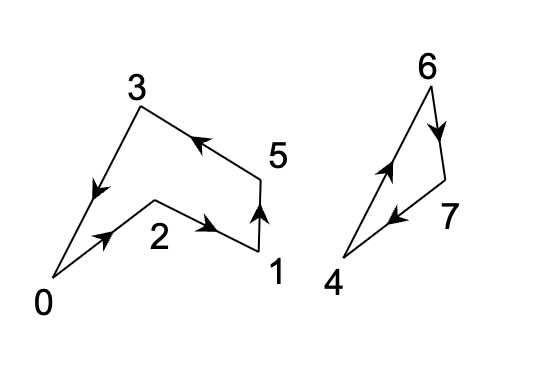

overhere, $4, 6, 7$ have a tour (and also implicitly $0, 1, 2, 3, 5$) have a tour. This particular type of instant is known as **subtours** which we need to eliminate from our model.

In order to do so we can add following constraints:
$$x_{46} + x_{64} + x_{47} + x_{74} + x_{67} + x_{76} \leq 2$$

Above constraint will automatically rule out $4, 6, 7$ as sub-tour by default and implicity remove $0, 1, 2, 3, 5$ as sub-tour. But it is worth to note that such problem will have exponential number of subtours. Below constraint can reduce these sub-tours:

\begin{align}
\sum_{i \in S} \sum_{j \in S, j \neq i} \delta_{ij} & \leq |S| - 1 \hspace{2em} \forall S \subset N, 2 \leq |S| \leq n \\
\text{above can also be rewritten as follows} \\
\sum_{i \in S} \sum_{j \notin S} \delta_{ij} & \geq 1 \hspace{2em} \forall S \subset N, S \notin \varnothing
\end{align}

# **P2. In Class Activity: Transporation Problem**

Let us consider the transportation problem in this practice exercise. Suppose that the steel plants at Durgapur, Bhilai and Salem produce Diesel locomotive wheels for Indian Railways.
The monthly production limits of the number of wheels at each steel plant are as below:
\begin{equation}
   \begin{matrix}
\text{Durgapur:}& 1400\\
\text{Bhilai:}&1700\\
\text{Salem:}& 1200
\end{matrix}
\end{equation}

Also suppose that the wheels are distributed to four major Railway hubs Delhi, Mumbai, Chennai and Kolkata. The monthly demands at each hub are given below:
\begin{equation}
   \begin{matrix}
\text{Delhi:} & 1000 \\
\text{Mumbai:} & 1300\\
\text{Chennai:}& 1100\\
\text{Kolkata:}& 900
\end{matrix}
\end{equation}

The cost (in crores of rupees) of transporting a wheel from the steel plants to the hubs are given below:
\begin{equation}
   \begin{matrix}
\text{Source/Dest}&\text{Delhi}&\text{Mumbai}&\text{Chennai}&\text{Kolkata}  \\
\text{Durgapur}&8&8&9&3\\
\text{Bhilai}&7&5&8&5 \\
\text{Salem}&12&8&1&9
   \end{matrix}
\end{equation}

The aim is to distribute the wheels from steel plants to the hubs at the ${\textbf{minimum possible cost}}$ such that the demands at hubs are met, and the constraints on the production limits at the steel plants are satisfied.

For solving this problem, we can associate a decision variable $x_{ij}$ for denoting the number of wheels transported from steel plant $i$ to a hub $j$.

Let $i$ take values from the set $\{1,2,3\}$ corresponding to Durgapur, Bhilai and Salem.
Let $j$ take values from the set $\{1,2,3,4\}$ corresponding to Delhi, Mumbai, Chennai and Kolkata.

Then we can see that the number of wheels transported from Durgapur to the four hubs is given by the sum $\sum_{j=1}^{4} x_{1j}$.
Similarly, the number of wheels transported from Bhilai to the four hubs is given by $\sum_{j=1}^{4} x_{2j}$.
And the number of wheels transported from Salem to the four hubs is given by $\sum_{j=1}^{4} x_{3j}$.

From the constraints on the production limits, we can thus write:
\begin{align}
\sum_{j=1}^{4} x_{1j} &\leq 1400  \text{ at Durgapur } \nonumber \\
\sum_{j=1}^{4} x_{2j} &\leq 1700  \text{ at Bhilai } \nonumber \\
\sum_{j=1}^{4} x_{3j} &\leq 1200  \text{ at Salem } \nonumber
\end{align}


Also, note that the number of wheels reaching Delhi from the three steel plants is given by the sum $\sum_{i=1}^{3} x_{i1}$.
The number of wheels reaching Mumbai from the three steel plants is given by the sum $\sum_{i=1}^{3} x_{i2}$.
The number of wheels reaching Chennai from the three steel plants is given by the sum $\sum_{i=1}^{3} x_{i3}$.
The number of wheels reaching Kolkata from the three steel plants is given by the sum $\sum_{i=1}^{3} x_{i4}$.

To satisfy the demands at the four hubs Delhi, Mumbai, Chennai and Kolkata, we thus need the following constraints:

\begin{align}
\sum_{i=1}^{3} x_{i1} &= 1000  \text{ at Delhi } \nonumber \\
\sum_{i=1}^{3} x_{i2} &= 1300  \text{ at Mumbai } \nonumber \\
\sum_{i=1}^{3} x_{i3} &= 1100  \text{ at Chennai } \nonumber \\
\sum_{i=1}^{3} x_{i4} &= 900  \text{ at Kolkata } \nonumber
\end{align}

Also note that the number of wheels transported between a steel plant $i$ and a hub $j$ must be non-negative. This gives us the constraint $x_{ij} \geq 0, \ \forall i \in \{1,2,3\}, \ \forall j \in \{1,2,3,4\}$.

Now we shall formulate the objective function. Since $x_{ij}$ wheels are transported between steel plant $i$ and hub $j$, and since we know the transportation cost of each wheel along the route between steel plant $i$ and hub $j$, we have the total transportation cost as below:

$8 x_{11} + 8 x_{12} + 9 x_{13} + 3 x_{14} + 7 x_{21} + 5 x_{22} + 8 x_{23} + 5 x_{24} + 12 x_{31} + 8 x_{32} + x_{33} + 9 x_{34}$.

Thus we have the following optimization problem:


\begin{align}
\min  \ 8 x_{11} + 8 x_{12} + 9 x_{13} + 3 x_{14} & + 7 x_{21} + 5 x_{22} + 8 x_{23} + 5 x_{24} + 12 x_{31} + 8 x_{32} + x_{33} + 9 x_{34} \nonumber \\
{\rm{s.t. }} \  \sum_{j=1}^{4} x_{1j} &\leq 1400   \nonumber \\
\sum_{j=1}^{4} x_{2j} &\leq 1700   \nonumber \\
\sum_{j=1}^{4} x_{3j} &\leq 1200   \nonumber \\
\text{ and } \nonumber \\
\sum_{i=1}^{3} x_{i1} &= 1000 \nonumber \\
\sum_{i=1}^{3} x_{i2} &= 1300  \nonumber \\
\sum_{i=1}^{3} x_{i3} &= 1100  \nonumber \\
\sum_{i=1}^{3} x_{i4} &= 900  \nonumber  \\
\text{ and } \nonumber \\
x_{ij} &\geq 0 \ \forall i \in \{1,2,3\}, \ \forall j \in \{1,2,3,4\}. \nonumber
\end{align}

### Below is a snip to solve above formulated problem



```python
# importing all the required libraries including pyomo and numpy
!pip -q install pyomo
from pyomo.environ import *
import numpy as np

# number of variable representing steel plants (M=3) and hubs (N=4)
M, N = 3, 4

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
row_indicies = np.arange(M)
col_indicies = np.arange(N)

# matrix of cost cofficient
cost = np.array([[8, 8, 9, 3], [7, 5, 8, 5], [12, 8, 1, 9]])

plant_cap = np.array([1400, 1700, 1200])
hub_demand = np.array([1000, 1300, 1100, 900])
# defining an empty model using pyomo
TransModel = ConcreteModel()

# defining varibles used in model x_{ij} (in total 4x3 = 12 variables)
TransModel.x = Var(row_indicies, col_indicies, domain= NonNegativeReals)

# setting up the objective function
TransModel.Objective = Objective(expr = sum(cost[i][j]*TransModel.x[i,j] for i in row_indicies for j in col_indicies), sense = minimize)

```

In [2]:
M, N = 3, 4

# since variable are two dimensional ie., x_{ij}, therefore both row and column indicies are defined below
row_indicies = np.arange(M)
col_indicies = np.arange(N)

# matrix of cost cofficient
cost = np.array([[8, 8, 9, 3], [7, 5, 8, 5], [12, 8, 1, 9]])

plant_cap = np.array([1400, 1700, 1200])
hub_demand = np.array([1000, 1300, 1100, 900])
# defining an empty model using pyomo
TransModel = ConcreteModel()

# defining varibles used in model x_{ij} (in total 4x3 = 12 variables)
TransModel.x = Var(row_indicies, col_indicies, domain= NonNegativeReals)

# setting up the objective function
TransModel.Objective = Objective(expr = sum(cost[i][j]*TransModel.x[i,j] for i in row_indicies for j in col_indicies), sense = minimize)



```python
# below we define constraints based on available demand at hub and capacity at plant
# creating empty list of constraints
TransModel.constraints = ConstraintList()

# adding constraint for production capacity
[TransModel.constraints.add(expr = sum(TransModel.x[i,j] for j in col_indicies) <= plant_cap[i]) for i in row_indicies]
[TransModel.constraints.add(expr = sum(TransModel.x[i,j] for i in row_indicies) == hub_demand[j]) for j in col_indicies]

# printing out pyomo model
TransModel.pprint()
```

In [5]:
TransModel.constraints = ConstraintList()

# adding constraint for production capacity
[TransModel.constraints.add(expr = sum(TransModel.x[i,j] for j in col_indicies) <= plant_cap[i]) for i in row_indicies]
[TransModel.constraints.add(expr = sum(TransModel.x[i,j] for i in row_indicies) == hub_demand[j]) for j in col_indicies]

# printing out pyomo model
TransModel.pprint()

4 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {1, 2, 3, 4, 5, 6, 7}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   12 : {(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)}
    x_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    x_index_1 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {0, 1, 2, 3}

1 Var Declarations
    x : Size=12, Index=x_index
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (0, 0) :     0 :  None :  None : False :  True : NonNegativeReals
        (0, 1) :     0 :  None :  None : False :  True : NonNegativeRe

```python
# installing cbc solver in collab session
!apt-get install -y -qq coinor-cbc
# using solverfactory to solve above constructed pyomo model
optCBC = SolverFactory('cbc')
result = optCBC.solve(TransModel)

print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)
```

In [6]:
optCBC = SolverFactory('cbc')
result = optCBC.solve(TransModel)

print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal



```python
# printing optimal solution (optimal transporation)
import pandas as pd

temp = pd.DataFrame({'Delhi': [TransModel.x[i, 0].value for i in row_indicies],
                     'Mumbai': [TransModel.x[i, 1].value for i in row_indicies],
                     'Chennai': [TransModel.x[i, 2].value for i in row_indicies],
                     'Kolkata': [TransModel.x[i, 3].value for i in row_indicies]})

```

In [8]:
# printing optimal solution (optimal transporation)
import pandas as pd

temp = pd.DataFrame({'Delhi': [TransModel.x[i, 0].value for i in row_indicies],
                     'Mumbai': [TransModel.x[i, 1].value for i in row_indicies],
                     'Chennai': [TransModel.x[i, 2].value for i in row_indicies],
                     'Kolkata': [TransModel.x[i, 3].value for i in row_indicies]})

In [9]:
temp

,Delhi,Mumbai,Chennai,Kolkata
0,500.0,0.0,0.0,900.0
1,500.0,1200.0,0.0,0.0
2,0.0,100.0,1100.0,0.0
